## Simulation Assignment

This notebook will contain the work for the assignment on simulation.
Let us start with our imports!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have a bunch of variables which we will be needing to create our simulation - let us set them up.

In [2]:
inc_0 = 80000
sigma = 0.13
persistance = 0.4
growth = 0.025
n_sims = 10000
np.random.seed(0)

Let us describe some of the variables and processes used in the simulation.

In [3]:
ln_inc = np.zeros(40)

In [4]:
ln_inc[0] = np.log(inc_0) + np.log(np.random.lognormal(0, sigma))

In [5]:
for t in range(2021, 2060):
    ln_inc[t - 2020] = (1 - persistance)*(ln_inc[0] + growth*(t - 2020)) + persistance*ln_inc[t - 2021] + np.log(np.random.lognormal(0, sigma))

In [6]:
np.exp(ln_inc)

array([100620.24094358, 107594.96755913, 120952.45716805, 151606.32601267,
       160470.39693257, 115123.99127211, 131463.26396073, 121951.88810289,
       120885.55310675, 130729.14291512, 132262.52279851, 159937.5013461 ,
       160077.84321155, 149589.35442255, 154110.80322217, 156062.79595161,
       185146.18996739, 161353.85028082, 165827.94541691, 146226.95903818,
       113180.89270873, 157335.0212078 , 187267.81154174, 165396.64644713,
       236327.55028811, 170516.49436208, 184618.86011264, 187690.73036726,
       239844.68894323, 266353.75670624, 237670.52460993, 237300.51578974,
       204206.31920435, 169348.86268624, 197229.46143561, 227212.24069212,
       280648.69093043, 308883.10826229, 264977.45409834, 255793.53204251])

The above round of simulation was for one set of error values. We can see the salaries growing quite fast. Let us now do the simulation 40 times. Instead of first drawing the 10,000 sets of 40 normally distributed errors we just draw from the distribution each time, which gives us the same result but is computationally faster.

In [7]:
def simulate(inc_0, sigma, persistance, growth, n_sims):
    sims = np.zeros((n_sims, 40))
    for i in range(0, n_sims):
        ln_inc = np.zeros(40)
        ln_inc[0] = np.log(inc_0) + np.log(np.random.lognormal(0, sigma))
        for t in range(2021, 2060):
            ln_inc[t - 2020] = (1 - persistance)*(ln_inc[0] + growth*(t - 2020)) + persistance*ln_inc[t - 2021] + np.log(np.random.lognormal(0, sigma))
        sims[i] = np.exp(ln_inc)
    return sims

In [8]:
sims = simulate(inc_0, sigma, persistance, growth, n_sims)

In [9]:
year_vec = np.arange(2020, 2060)

Text(0, 0.5, 'Annual Salary')

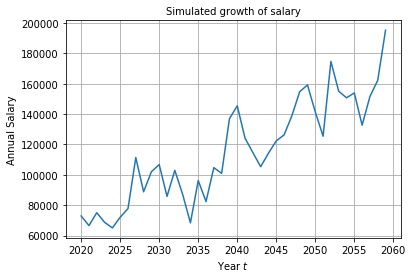

In [10]:
plt.plot(year_vec, sims[7])
# add grid
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulated growth of salary', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Salary')

In the above case we plotted the 8th simulation. All the simulations more or less observe the same trend (as expected). Let us now plot the histogram of 50 bins.

(array([  2.,   4.,  16.,  19.,  46.,  48.,  59., 134., 139., 187., 273.,
        341., 406., 457., 490., 545., 563., 535., 592., 589., 597., 543.,
        506., 458., 392., 359., 306., 268., 233., 181., 132., 116.,  93.,
         82.,  83.,  64.,  43.,  23.,  24.,  12.,  11.,   7.,   7.,   1.,
          7.,   2.,   2.,   0.,   2.,   1.]),
 array([ 50225.18182133,  51782.43027151,  53339.6787217 ,  54896.92717188,
         56454.17562207,  58011.42407225,  59568.67252244,  61125.92097262,
         62683.1694228 ,  64240.41787299,  65797.66632317,  67354.91477336,
         68912.16322354,  70469.41167373,  72026.66012391,  73583.9085741 ,
         75141.15702428,  76698.40547447,  78255.65392465,  79812.90237484,
         81370.15082502,  82927.39927521,  84484.64772539,  86041.89617558,
         87599.14462576,  89156.39307595,  90713.64152613,  92270.88997632,
         93828.1384265 ,  95385.38687669,  96942.63532687,  98499.88377706,
        100057.13222724, 101614.38067743, 103171.6

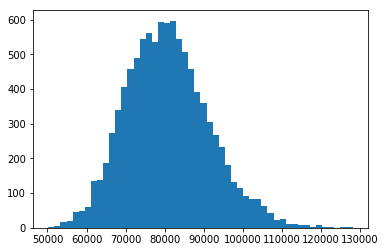

In [11]:
plt.hist(sims[:,0], 50)

The distribution is log-normal, but isn't very far away from being a normal distribution.
According to our distribution, some of the class will earn more than 100,000, and some of the class will earn less than 70000. Let us use the `np.where` function to get the exact values!

In [12]:
len(np.where(sims[:,0] > 100000)[0])

468

In [13]:
len(np.where(sims[:,0] < 70000)[0])

1548

4.68% of the population earn more than 10,000 and 15.48% of the population earn less than 70,000.
Let us now try and calculate the number of years it takes to pay off debt!

In [14]:
debt = 95000
n_years = np.zeros(10000)

In [15]:
def no_years(salary, debt):
    years = 0
    while debt > 0:
        years += 1
        debt = debt - 0.10 * salary[years]
    return (years + 1)

In [16]:
for i in range(0, 10000):
    n_years[i] = no_years(sims[i], debt)

(array([  18.,  254., 1204., 2507., 2880., 1930.,  879.,  247.,   67.,
          14.]),
 array([ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]),
 <a list of 10 Patch objects>)

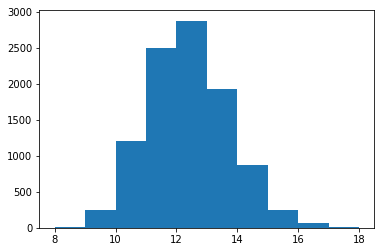

In [17]:
plt.hist(n_years)

The above histogram is the histogram of the number of years students in the program take to repay their debts. 

Let us use np.where again to see how many people were able to off their debt in 10 years or less.

In [18]:
len(np.where(n_years <= 10)[0])

1476

That's 14.76% of the simulations where the debt was paid off in 10 years or less.

In [19]:
inc_0 = 90000
sigma = 0.17
persistance = 0.4
growth = 0.025
n_sims = 10000

In [20]:
sims = simulate(inc_0, sigma, persistance, growth, n_sims)

In [21]:
for i in range(0, 10000):
    n_years[i] = no_years(sims[i], debt)

(array([  87.,  476., 1430., 2352., 2392., 2691.,  394.,  131.,   39.,
           8.]),
 array([ 6. ,  7.2,  8.4,  9.6, 10.8, 12. , 13.2, 14.4, 15.6, 16.8, 18. ]),
 <a list of 10 Patch objects>)

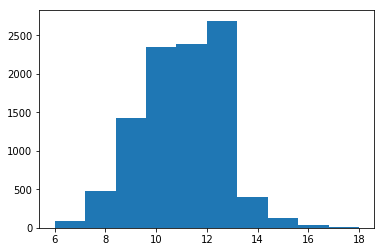

In [22]:
plt.hist(n_years)

In [23]:
len(np.where(n_years <= 10)[0])

4345

We can see that the number of people who are able to pay off their debt are mich higher now - it has risen to 43.45% of the population!